In [1]:
import torch 
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib  inline

In [2]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vocab of the characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset 
block_size = 3
X, Y = [], []
for w in words[:5]:

    print(w)
    context = [0] * block_size
    for ch in w + '.':
        
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]  # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [9]:
C = torch.randn((27,2))  # bcoz 27 possible outcomes and we will have 2 dim embedding

In [10]:
C[5]

tensor([-0.0780, -0.5518])

In [11]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.0780, -0.5518])

In [12]:
 C[torch.tensor([5,6,7,7])]

tensor([[-0.0780, -0.5518],
        [ 1.3344,  2.2605],
        [-1.5991,  0.6728],
        [-1.5991,  0.6728]])

In [13]:
C[X].shape

torch.Size([32, 3, 2])

In [14]:
X[13,2]

tensor(1)

In [15]:
C[X][13,2]

tensor([0.7391, 0.2942])

In [17]:
C[1]

tensor([0.7391, 0.2942])

In [18]:
# embed
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [19]:
# weights and biases
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [20]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [21]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)   # [32,100]

In [25]:
# the final layer
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [27]:
logits = h @ W2 + b2

In [28]:
logits.shape

torch.Size([32, 27])

In [29]:
counts = logits.exp()

In [30]:
probs = counts / counts.sum(1, keepdims=True)

In [31]:
probs.shape

torch.Size([32, 27])

In [32]:
probs[0].sum()

tensor(1.0000)

In [33]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [34]:
probs[torch.arange(32), Y]

tensor([1.3863e-05, 2.1859e-08, 2.1321e-06, 1.5304e-10, 6.4906e-15, 3.6199e-12,
        1.0006e-06, 1.6731e-03, 2.2093e-10, 6.9062e-06, 1.1291e-11, 9.3044e-06,
        2.5491e-09, 2.5432e-12, 3.9792e-10, 4.5589e-10, 1.1714e-08, 2.0479e-09,
        6.8922e-08, 1.0739e-16, 9.8936e-02, 8.2896e-06, 9.0457e-07, 6.2039e-11,
        4.8373e-12, 3.9552e-08, 1.5052e-12, 9.7996e-11, 8.5787e-14, 7.2860e-06,
        1.1644e-13, 8.2823e-06])

In [35]:
torch.arange(32)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [36]:
[torch.arange(32), Y]

[tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])]

In [38]:
# negative log likelihood
loss = -probs[torch.arange(32), Y].log().mean()
loss   # the loss that needs to minimized

tensor(19.4994)

In [61]:
# build the complete dataset 
block_size = 3
X, Y = [], []
for w in words:

    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]  # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [69]:
#----------------- now made respectable ----------------

In [122]:
Xtr.shape, Ytr.shape

(torch.Size([182580, 3]), torch.Size([182580]))

In [183]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [184]:
sum(p.nelement() for p in parameters)  # no of parameters in total

11897

In [185]:
for p in parameters:
    p.requires_grad = True

In [186]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [187]:
lri = []
lossi = []
stepi = []

In [188]:

for i in range(200000):

    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass
    emb = C[Xtr[ix]]                      # (32,3,2)            
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)    
    logits = h @ W2 + b2                        
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss =F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update
    # lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())

2.075376033782959


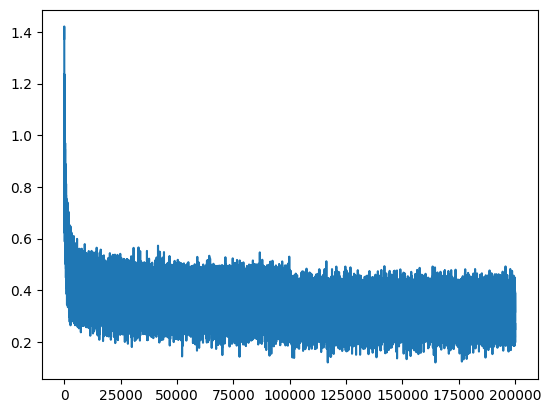

In [189]:
plt.plot(stepi, lossi)

In [190]:
emb = C[Xtr]                      # (32,3,2)            
h = torch.tanh(emb.view(-1,30) @ W1 + b1)    
logits = h @ W2 + b2 
loss =F.cross_entropy(logits, Ytr)
loss

tensor(2.1213, grad_fn=<NllLossBackward0>)

In [191]:
emb = C[Xdev]                      # (32,3,2)            
h = torch.tanh(emb.view(-1,30) @ W1 + b1)    
logits = h @ W2 + b2 
loss =F.cross_entropy(logits, Ydev)
loss

tensor(2.1574, grad_fn=<NllLossBackward0>)

In [192]:
# sample from the trained model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

eria.
kayah.
see.
med.
rylle.
emmaniendraeg.
azeredieliigh.
parelle.
elies.
anaraelyn.
malara.
noshubergiagriel.
kin.
renleigh.
ter.
fin.
zen.
dariyah.
faehs.
kayshaston.


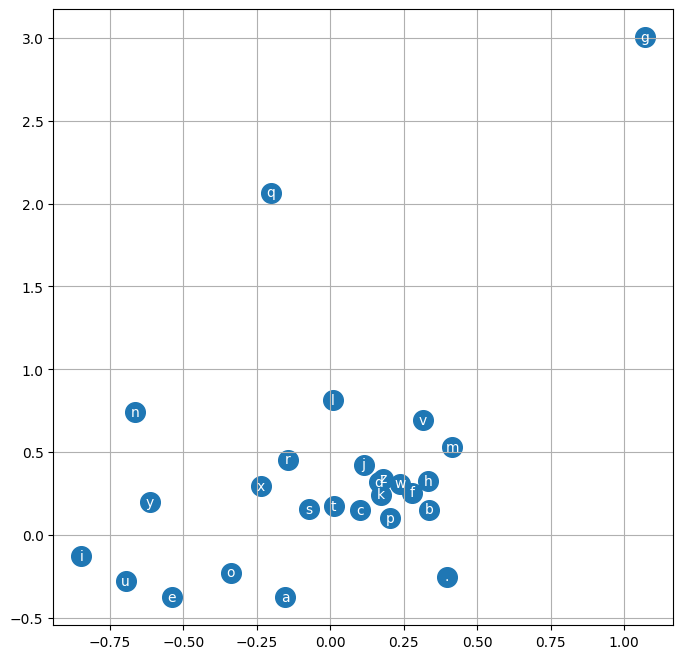

In [165]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

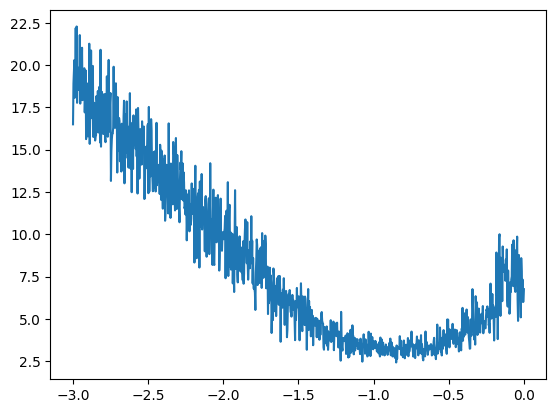

In [108]:
plt.plot(lri, lossi)

In [59]:
logits.max(1)

torch.return_types.max(
values=tensor([13.3349, 17.7903, 20.6014, 20.6123, 16.7355, 13.3349, 15.9982, 14.1721,
        15.9144, 18.3614, 15.9394, 20.9265, 13.3349, 17.1091, 17.1320, 20.0602,
        13.3349, 16.5894, 15.1017, 17.0582, 18.5859, 15.9669, 10.8740, 10.6870,
        15.5056, 13.3349, 16.1795, 16.9742, 12.7426, 16.2010, 19.0844, 16.0197],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [60]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

### Split the dataset

In [ ]:
# training set, dev/validation set, test set
# 80%, 10%, 10%

In [119]:
# split the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182580, 3]) torch.Size([182580])
torch.Size([22767, 3]) torch.Size([22767])
torch.Size([22799, 3]) torch.Size([22799])
